***UNDERSTANDING THE DATA***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf


In [7]:
symbol = 'AAPL'
start = '2014-01-01'
end = '2024-01-01'

dataset = yf.download(symbol, start, end)
dataset.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.192822,17.314045,17.158320,17.272083,234684800
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785950,16.969959,16.720054,16.918984,317209200
2014-01-08,16.892254,16.957527,16.743989,16.747718,258529600


In [8]:
#The error you're encountering is due to multi-level (hierarchical) column names in your plot_data DataFrame.
#This shows that your DataFrame has two levels of column headers — Price and Ticker, with Open and Close both under Price and corresponding to the ticker AAPL.
#You need to flatten the column headers so that Seaborn can correctly interpret column names.

dataset.columns = dataset.columns.get_level_values(0)
dataset.columns


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [9]:
dataset.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,17.192822,17.314045,17.158320,17.272083,234684800
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785950,16.969959,16.720054,16.918984,317209200
2014-01-08,16.892254,16.957527,16.743989,16.747718,258529600


In [10]:
#create more data from existing variables to extract more information from it
dataset['Increase_decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'], 1, 0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'], 1, -1)
dataset['Buy_Sell'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, -1)
dataset['Return'] = dataset['Close'].pct_change()
dataset = dataset.dropna()
dataset['Class'] = np.where(dataset['Return'].shift(-1) > dataset['Return'], 'Increase', 'Decrease')

In [11]:
dataset.head()

Price,Close,High,Low,Open,Volume,Increase_decrease,Buy_Sell_on_Open,Buy_Sell,Return,Class
Date,,,,,,,,,,
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600,1,-1,1,-0.021966,Increase
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,0,1,-1,0.005453,Decrease
2014-01-07,16.785950,16.969959,16.720054,16.918984,317209200,0,-1,1,-0.007152,Increase
2014-01-08,16.892254,16.957527,16.743989,16.747718,258529600,1,1,-1,0.006333,Decrease
2014-01-09,16.676537,16.997932,16.640169,16.996067,279148800,1,-1,-1,-0.012770,Increase


In [13]:
print('Exploratory Data Analysis')
print('Stock Data')
print('-'*40)
print("Dataset information") 
print(dataset.info(memory_usage='deep',verbose=False))
print('-'*40)
print(dataset.info())
print('-'*40)
print("Data type:")
print(dataset.dtypes)
print('-'*40)
print("Check unique values without NaN")
print(dataset.nunique())
print('-'*40)
print("Data shape:")
print(dataset.shape)
print('-'*40)
print("Data columns Names:")
print(dataset.columns)
print('-'*40)
print("Check for NaNs:")
print(dataset.isnull().values.any())
print('-'*40)
print("How many NaN it has in each columns?")
print(dataset.isnull().sum())
print('-'*40)
print("Data Statistics Summary:")
print(dataset.describe())


Exploratory Data Analysis
Stock Data
----------------------------------------
Dataset information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-01-03 to 2023-12-29
Columns: 10 entries, Close to Class
dtypes: float64(5), int64(4), object(1)
memory usage: 336.5 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-01-03 to 2023-12-29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              2515 non-null   float64
 1   High               2515 non-null   float64
 2   Low                2515 non-null   float64
 3   Open               2515 non-null   float64
 4   Volume             2515 non-null   int64  
 5   Increase_decrease  2515 non-null   int64  
 6   Buy_Sell_on_Open   2515 non-null   int64  
 7   Buy_Sell           2515 non-null   int64  
 8   Return             2515 non-null   float64
 9   Class  

In [14]:
print(dataset.groupby('Class').size())

Class
Decrease    1272
Increase    1243
dtype: int64


Class
Decrease    1272
Increase    1243
Name: count, dtype: int64

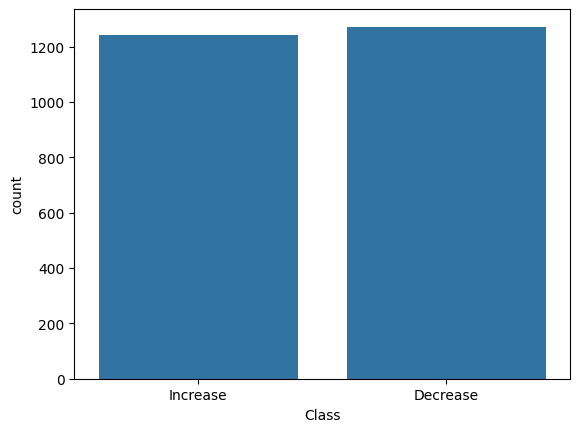

In [16]:
#Plot class
import seaborn as sns

sns.countplot( x = 'Class', data = dataset)
dataset.loc[:, 'Class'].value_counts()

***VISULATIZE THE DATA***

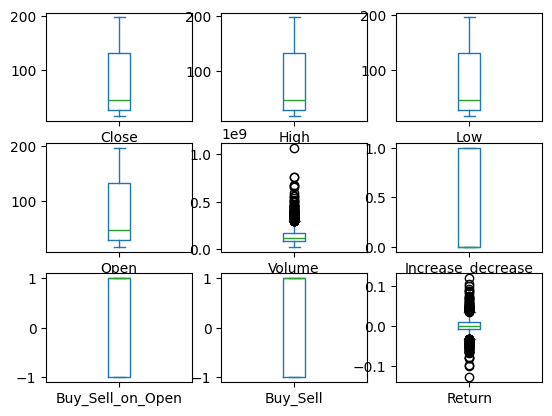

In [20]:
#Box and whisker plots
dataset.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False)
plt.show()

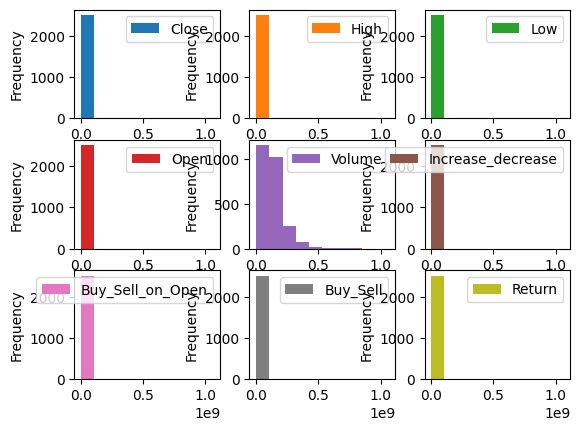

In [21]:
#Histogram plots
dataset.plot(kind = 'hist', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

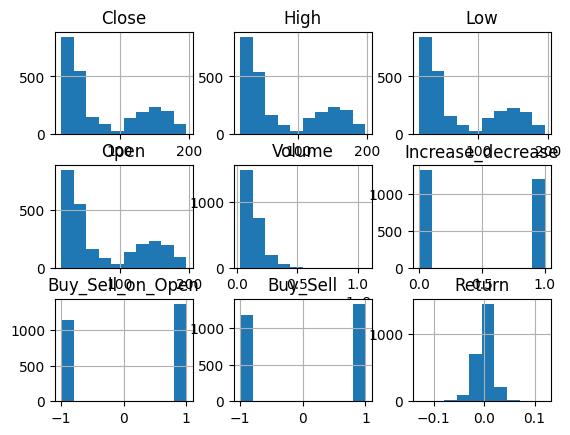

In [22]:
#Histograms
dataset.hist()
plt.show()

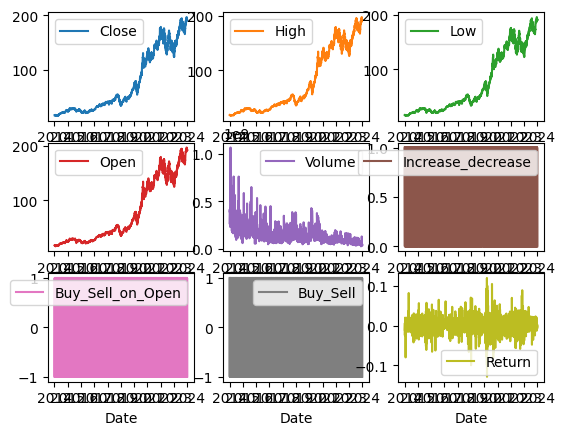

In [23]:
dataset.plot(kind = 'line', subplots =True, layout = (3, 3), sharex = False, sharey = False)
plt.show()

In [24]:
x = dataset[['Open', 'Close', 'High', 'Low']]
y = dataset.index

<function matplotlib.pyplot.show(close=None, block=None)>

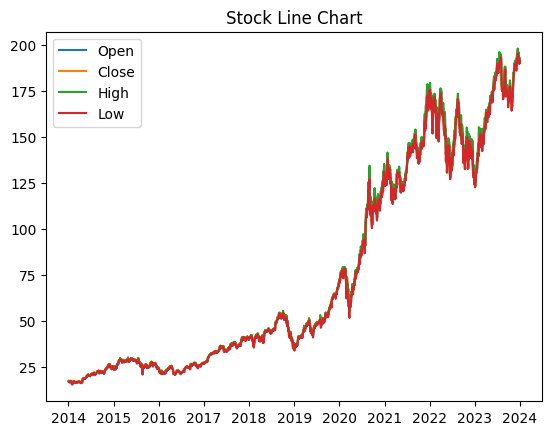

In [25]:
plt.plot(x)
plt.title('Stock Line Chart')
plt.legend(x)
plt.show

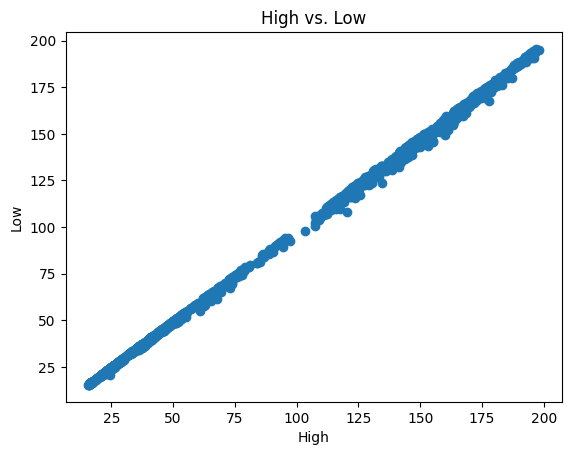

In [26]:
plt.scatter(dataset['High'], dataset['Low'])
plt.title("High vs. Low")
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

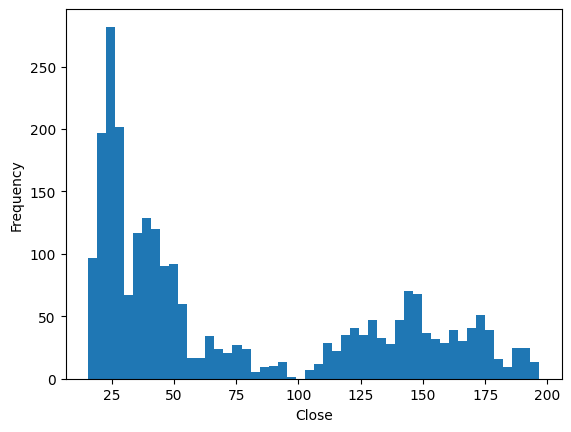

In [29]:
plt.hist(dataset['Close'], bins = 50)
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.show()

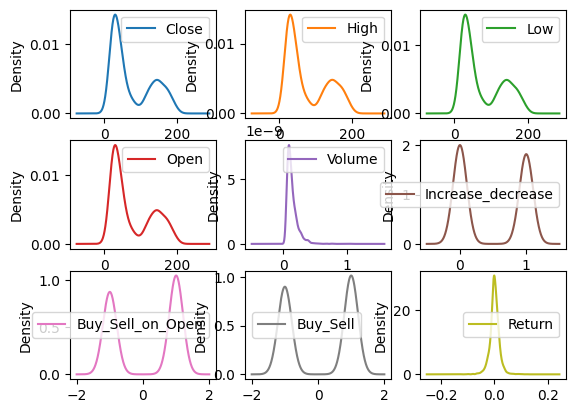

In [30]:
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

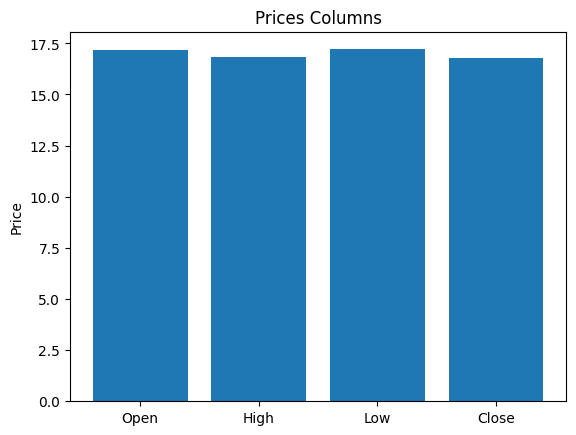

In [31]:
labels = ['Open','High','Low','Close']
y_positions = range(len(labels))
# Creating our bar plot
plt.bar(y_positions, x.iloc[0])
plt.xticks(y_positions, labels)
plt.ylabel("Price")
plt.title("Prices Columns")
plt.show()

In [37]:
dataset.head()

Price,Close,High,Low,Open,Volume,Increase_decrease,Buy_Sell_on_Open,Buy_Sell,Return,Class
Date,,,,,,,,,,
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600,1,-1,1,-0.021966,Increase
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,0,1,-1,0.005453,Decrease
2014-01-07,16.785950,16.969959,16.720054,16.918984,317209200,0,-1,1,-0.007152,Increase
2014-01-08,16.892254,16.957527,16.743989,16.747718,258529600,1,1,-1,0.006333,Decrease
2014-01-09,16.676537,16.997932,16.640169,16.996067,279148800,1,-1,-1,-0.012770,Increase


In [39]:
#performing one hot encoding for the Class variable as we can't get a heatmap as there is one string type in the data

dataset_encoded = pd.get_dummies(dataset, columns = ['Class'], drop_first = 1)
dataset_encoded.head()

,Close,High,Low,Open,Volume,Increase_decrease,Buy_Sell_on_Open,Buy_Sell,Return,Class_Increase
Date,,,,,,,,,,
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600,1,-1,1,-0.021966,True
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,0,1,-1,0.005453,False
2014-01-07,16.785950,16.969959,16.720054,16.918984,317209200,0,-1,1,-0.007152,True
2014-01-08,16.892254,16.957527,16.743989,16.747718,258529600,1,1,-1,0.006333,False
2014-01-09,16.676537,16.997932,16.640169,16.996067,279148800,1,-1,-1,-0.012770,True


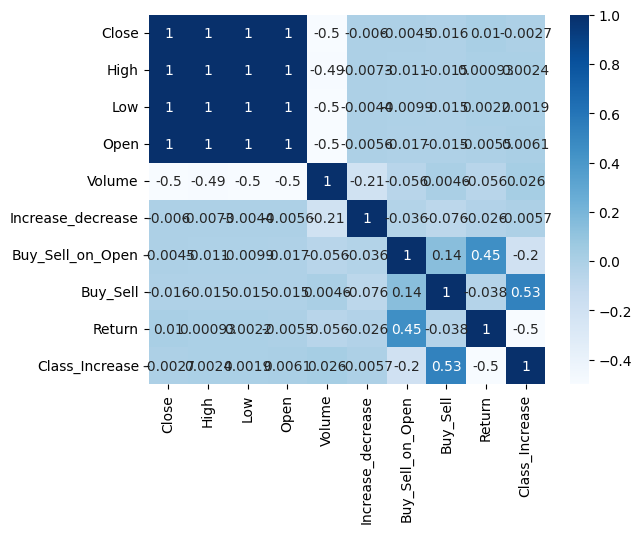

In [45]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.Figure(figsize = (10, 8))
sns.heatmap(dataset_encoded.iloc[:dataset.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

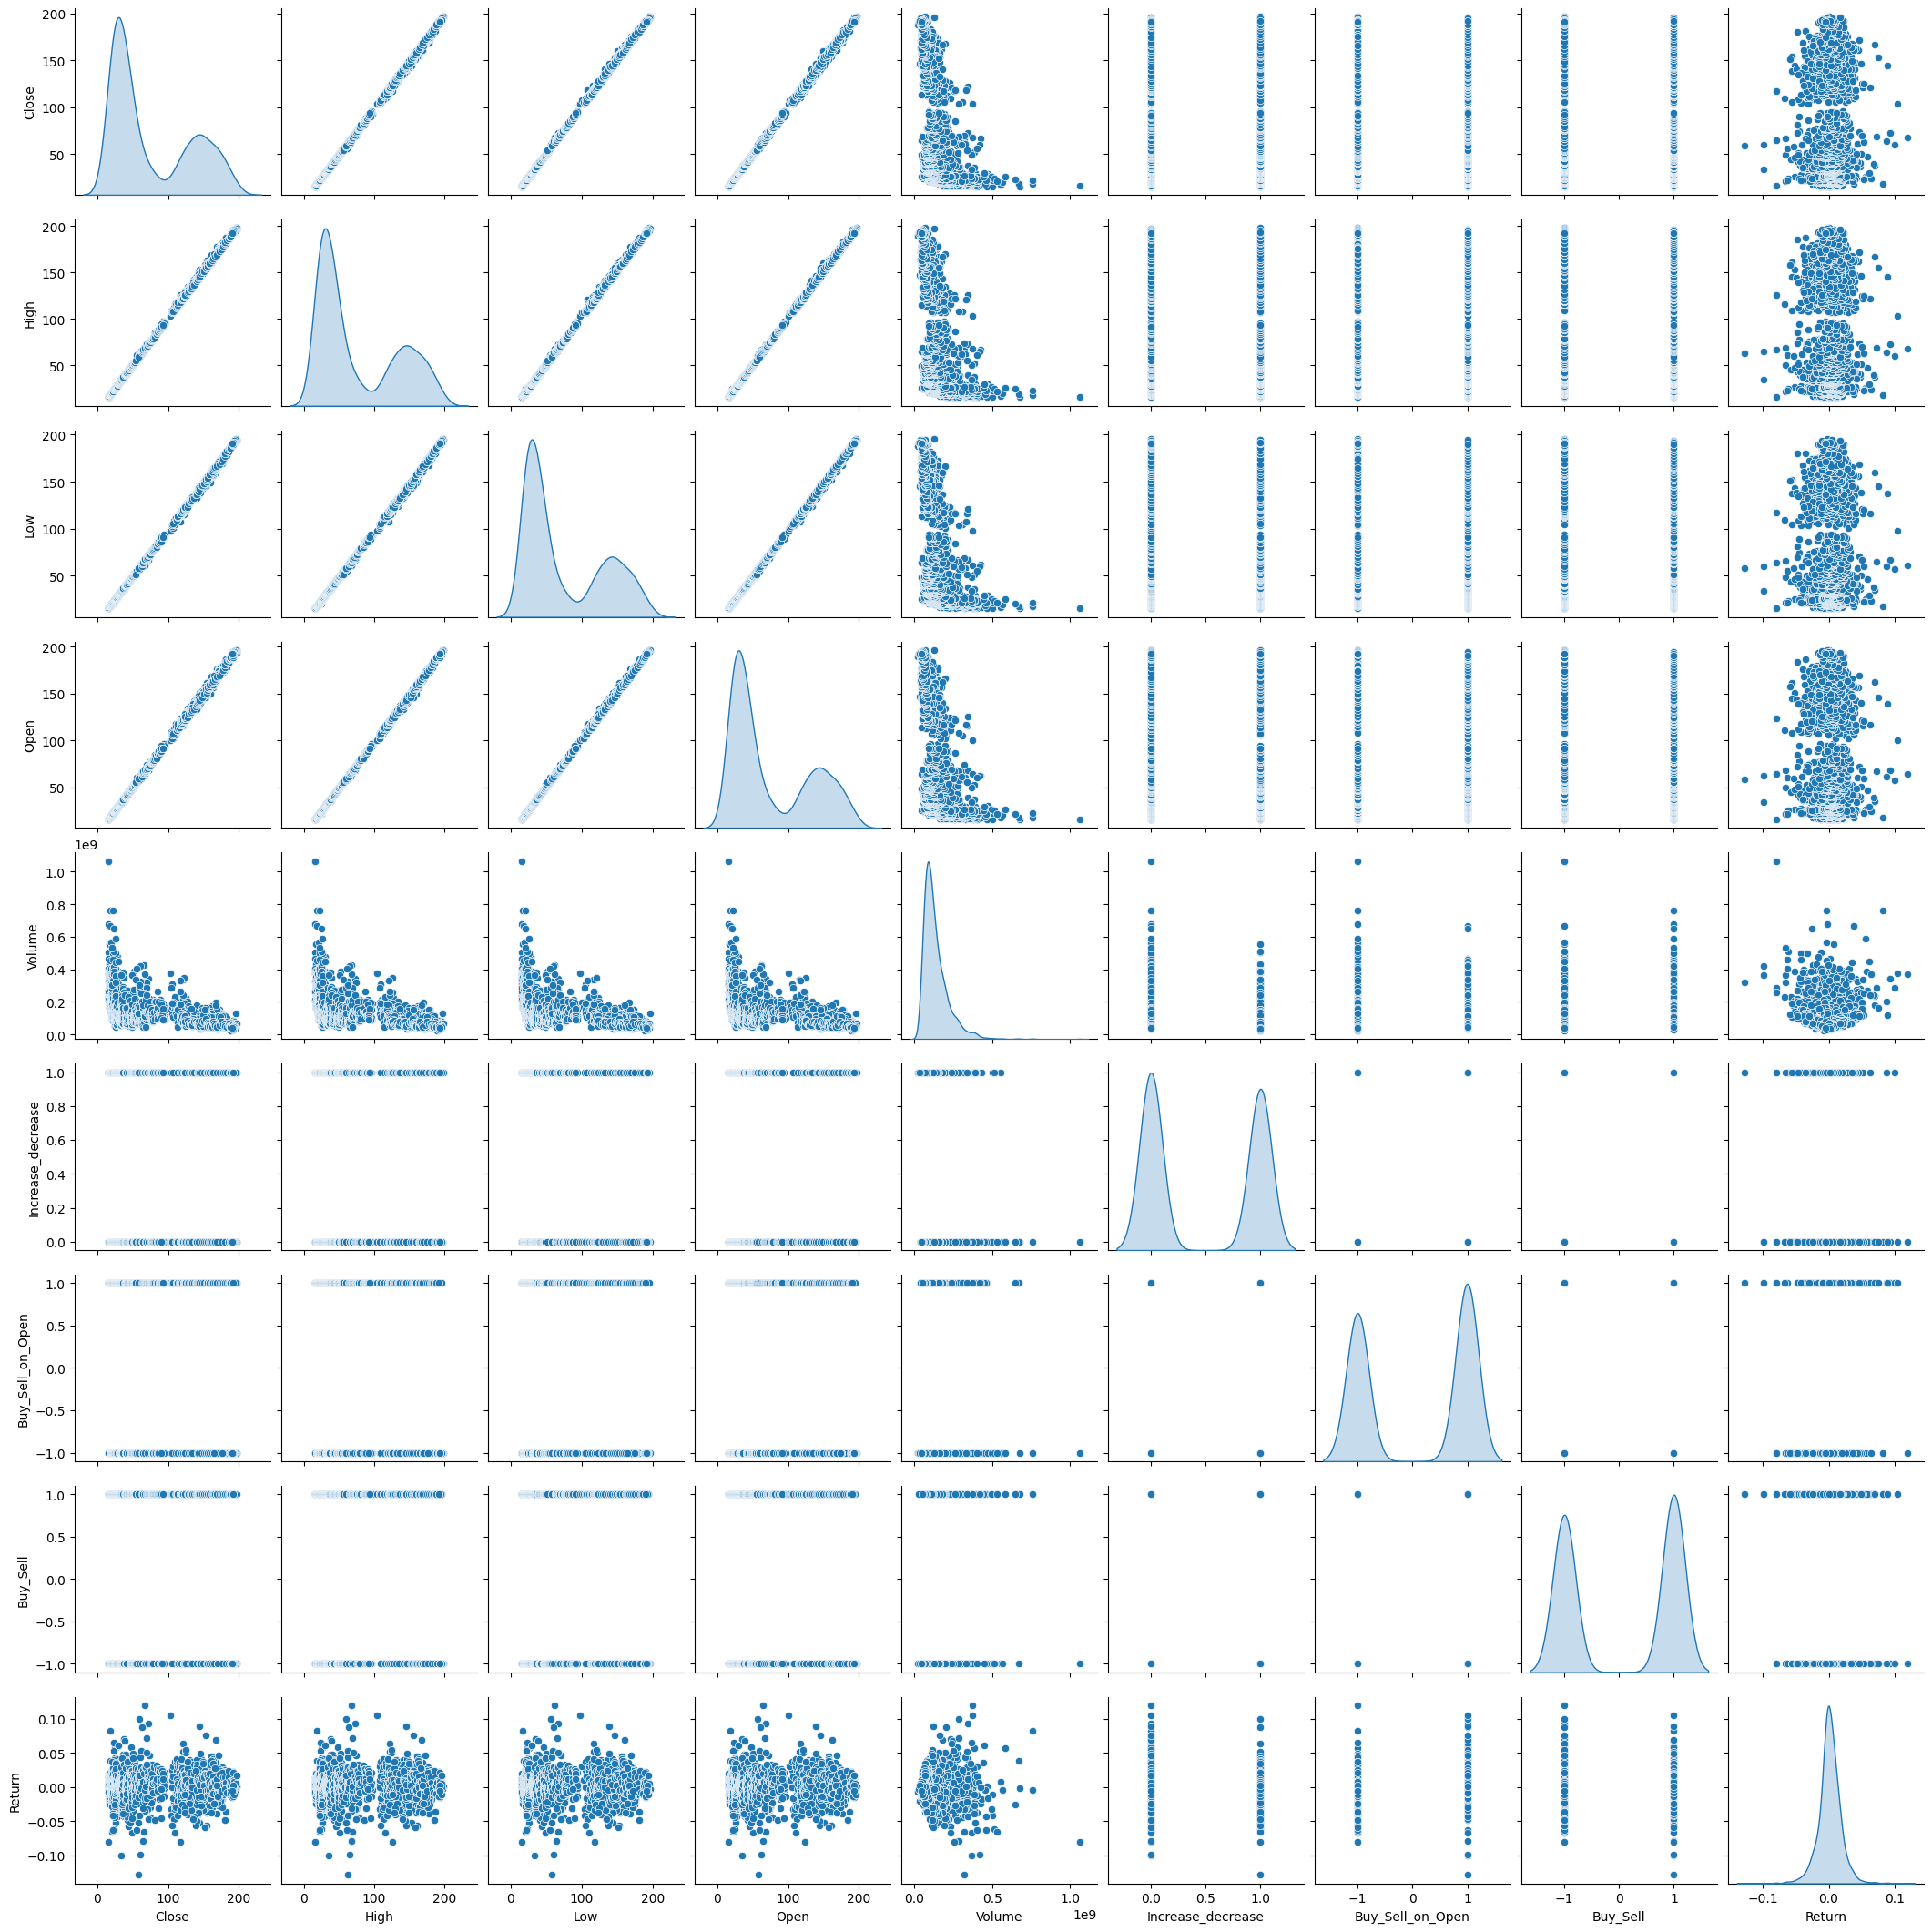

In [46]:
sns.pairplot(dataset, diag_kind='kde', size = 2.4)

In [ ]:
#import graph objects as 'go'
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objects as go

tls.set_credentials_file(username = 'Quantpython', api_key = 'bWmf0mKJlNViBrOjDQbE')

trace = go.Candlestick(x = dataset.index,
                       open = dataset.Open,
                       high = dataset.High,
                       low = dataset.Low,
                       close = dataset.Close)

data = [trace]

fig = go.Figure(data)

fig.show()

In [ ]:
x = dataset['Low']
y = dataset['High']
z = dataset['Close']

trace1 = go.Scatter3d(
    x = x,
    y = y,
    z = z,
    mode = 'markers',
    marker = dict
    (
        size = 12,
        color = z,
        colorscale = 'ylgnbu',
        opacity = 0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    )
)

fig = go.Figure(data = data, layout = layout)


In [56]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [58]:
#Create a new line chat with a title and axis labels
p = figure(width = 400, height = 400)
p.line(dataset.index, dataset['Close'])

show(p)

In [59]:
#Create a blank figure with labels
p = figure(width=600, height=600,
           title= 'Stock Prices',
           x_axis_label='x', y_axis_label='y')

In [60]:
#example data
squares_x = dataset['Open']
squares_y = dataset['Close']
circles_x = dataset['Low']
circles_y = dataset['High']

In [61]:
#add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)

#add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

GlyphRenderer(id='p1101', ...)

In [62]:
#Set to output the plot in the notebook
output_notebook()
show(p)

Loading BokehJS ...

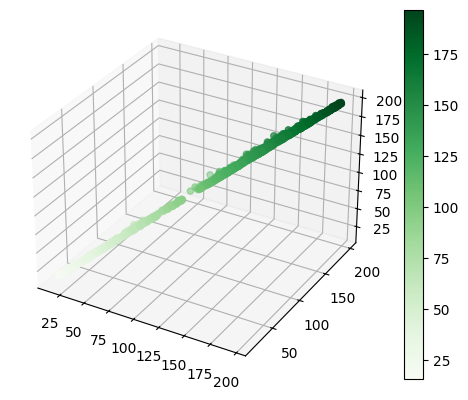

In [72]:
from mpl_toolkits import mplot3d

#plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

#data for three-dimentional scattered points
zdata = dataset['Close']
xdata = dataset['Low']
ydata = dataset['High']

a = ax.scatter(xdata, ydata, zdata, c = zdata, cmap = 'Greens')
cbar=plt.colorbar(a)

plt.show(a)


In [73]:
dataset_encoded.head()

,Close,High,Low,Open,Volume,Increase_decrease,Buy_Sell_on_Open,Buy_Sell,Return,Class_Increase
Date,,,,,,,,,,
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600,1,-1,1,-0.021966,True
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,0,1,-1,0.005453,False
2014-01-07,16.785950,16.969959,16.720054,16.918984,317209200,0,-1,1,-0.007152,True
2014-01-08,16.892254,16.957527,16.743989,16.747718,258529600,1,1,-1,0.006333,False
2014-01-09,16.676537,16.997932,16.640169,16.996067,279148800,1,-1,-1,-0.012770,True
